In [114]:
import numpy as np # linear algebra
import gc
import matplotlib.pyplot as plt
import cv2 as cv
import os
import seaborn as sns
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


Total number of pokemons: 150
Total number of images: 10842


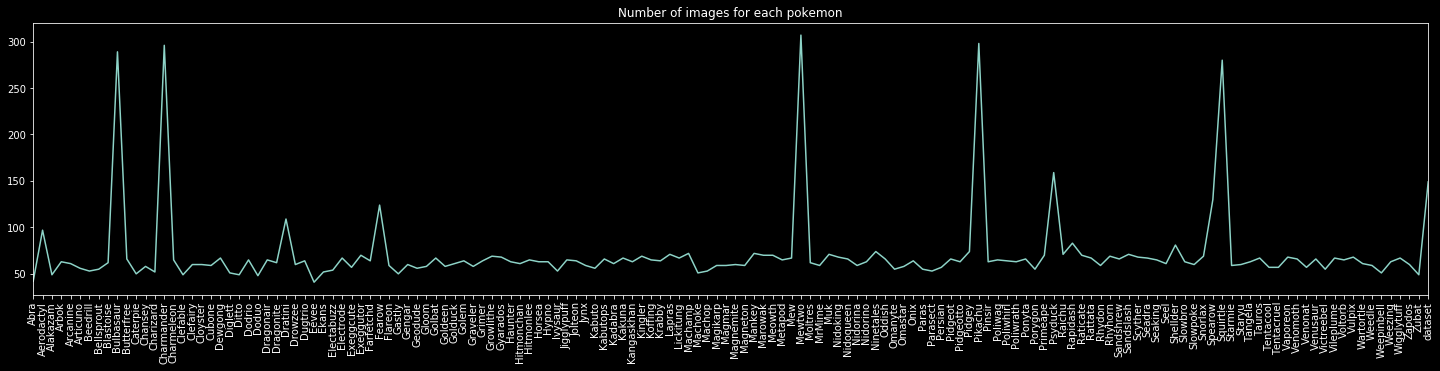

In [115]:
root_path = './dataset'
classes = os.listdir(root_path)
count=0
count_dict = {}
print(f'Total number of pokemons: {len(classes)}')
for pokemon in classes:
    dir_path = os.path.join(root_path, pokemon)
    count+=len(os.listdir(dir_path))
    count_dict[pokemon] = len(os.listdir(dir_path))
print(f'Total number of images: {count}')
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(count_dict.keys()), y = list(count_dict.values())).set_title('Number of images for each pokemon')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()


In [116]:
# sorted the list of pokemons with respect to number of their appearances in the datasett
sorted_list =  sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
sorted_list

[('Mewtwo', 307),
 ('Pikachu', 298),
 ('Charmander', 296),
 ('Bulbasaur', 289),
 ('Squirtle', 280),
 ('Psyduck', 159),
 ('dataset', 149),
 ('Spearow', 130),
 ('Fearow', 124),
 ('Dratini', 109),
 ('Aerodactyl', 97),
 ('Rapidash', 83),
 ('Shellder', 81),
 ('Ninetales', 74),
 ('Pidgey', 74),
 ('Machamp', 72),
 ('Mankey', 72),
 ('Lapras', 71),
 ('Muk', 71),
 ('Raichu', 71),
 ('Sandslash', 71),
 ('Exeggutor', 70),
 ('Marowak', 70),
 ('Meowth', 70),
 ('Primeape', 70),
 ('Raticate', 70),
 ('Growlithe', 69),
 ('Kingler', 69),
 ('Rhyhorn', 69),
 ('Snorlax', 69),
 ('Gyarados', 68),
 ('Nidoking', 68),
 ('Scyther', 68),
 ('Vaporeon', 68),
 ('Vulpix', 68),
 ('Dewgong', 67),
 ('Electrode', 67),
 ('Golbat', 67),
 ('Kakuna', 67),
 ('Lickitung', 67),
 ('Mew', 67),
 ('Rattata', 67),
 ('Seadra', 67),
 ('Tauros', 67),
 ('Vileplume', 67),
 ('Wigglytuff', 67),
 ('Butterfree', 66),
 ('Kabutops', 66),
 ('Nidoqueen', 66),
 ('Oddish', 66),
 ('Pidgeot', 66),
 ('Ponyta', 66),
 ('Sandshrew', 66),
 ('Venomoth', 66)

In [117]:
chosen_pokemon = sorted_list[0:3]
chosen_pokemon

[('Mewtwo', 307), ('Pikachu', 298), ('Charmander', 296)]

In [118]:
def generate_extra_two(img):
    return img[0:96, 0:96,:], img[4:100, 4:100, :]
def generate_extra_three(img):
    return generate_extra_two(img)[0], generate_extra_two(img)[1], img[2:98,2:98,:]

In [119]:
#generate data and labels
X = []
y= []
poke_label_dict = {}
i=0
for pokemon in chosen_pokemon:
    name = pokemon[0]
    poke_label_dict[i] = name
    print(name+ ': ' + str(i))
    dir_path = os.path.join(root_path, name)
    j=0
    if pokemon[1] < 70:
        for filename in os.listdir(dir_path):   
            try:
                file_path = os.path.join(dir_path, filename)
                img = cv.imread(file_path, 1)
                img = cv.resize(img, (96, 96))
                extra = generate_extra_three(img)
                for e in range(3):
                    X.append(extra[e])
                    y.append(i)
                gc.collect()
            except:
                j+=1
                print(str(j)+ " Broken file(s)")

    elif pokemon[1] < 100:
        for filename in os.listdir(dir_path):   
            try:
                file_path = os.path.join(dir_path, filename)
                img = cv.imread(file_path, 1)
                img = cv.resize(img, (96, 96))
                extra = generate_extra_two(img)
                for e in range(2):
                    X.append(extra[e])
                    y.append(i)
                gc.collect()
            except:
                j+=1
                print(str(j)+ " Broken file(s)")    
    else:
        for filename in os.listdir(dir_path):   
            try:
                file_path = os.path.join(dir_path, filename)
                img = cv.imread(file_path, 1)
                img = cv.resize(img, (96, 96))
                X.append(img)
                y.append(i)
                gc.collect()
            except:
                j+=1
                print(str(j)+ " Broken file(s)")
    i+=1

Mewtwo: 0
1 Broken file(s)
Pikachu: 1
Charmander: 2


In [120]:
#convert X to 4-dimensional tensor
X = np.array(X).reshape(-1, 96, 96, 3)
#normalize X
X = X/255.0
#convert y to one-hot-encoded form
y = to_categorical(np.array(y))

In [121]:
X.shape, y.shape

((900, 96, 96, 3), (900, 3))

In [122]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [123]:
X.max(),X.min()


(1.0, 0.0)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=500,test_size=0.2)

In [125]:
#check shape of training and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 96, 96, 3), (180, 96, 96, 3), (720, 3), (180, 3))

In [126]:
X_test_NN = X_test.reshape(X_test.shape[0],-1)
X_train_NN = X_train.reshape(X_train.shape[0],-1)

In [127]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {} #Dictionary
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None

    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_

    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3

    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [128]:
def loss(y_oht,p):
#     print(p)
#     print(y_oht)
    l = -np.mean(y_oht*np.log(p))
    return l


In [129]:
def one_hot(y,depth):
    
    m = y.shape[0]
#     print(m)
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [130]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
#     classes = len(np.unique(Y))
#     Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        
        Y_ = model.forward(X)
#         print(Y.shape)
        l = loss(Y,Y_)
#         print(X.shape, Y.shape)
        model.backward(X,Y,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [144]:
model = NeuralNetwork(input_size=27648,layers=[100,50],output_size=3)

In [132]:
y_train_NN = []
y_test_NN = []

In [133]:
for i in y_train:
    for j in range (len(i)):
        if(i[j]==1):
            y_train_NN.append(int(j))

In [134]:
for i in y_test:
    for j in range (len(i)):
        if(i[j]==1):
            y_test_NN.append(int(j))

In [135]:
x = np.array(y_test_NN)

In [136]:
y_test_NN = x

In [137]:
x = np.array(y_train_NN)

In [138]:
y_train_NN = x

In [139]:
print(y_test_NN.shape , y_train_NN.shape)

(180,) (720,)


In [140]:
print(X_train_NN.shape)

(720, 27648)


In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import ConfusionMatrixDisplay
import pydotplus
from io import StringIO
import graphviz
from IPython.display import IFrame
def train_model(criterion_name, file):
    dt = DecisionTreeClassifier(criterion=criterion_name, max_depth = 100, min_samples_leaf=10)
    dt = dt.fit(X_train_NN, y_train_NN)
    y_pred = dt.predict(X_test_NN)
#     tree.plot_tree(dt)
    print(classification_report(y_pred,y_test_NN))

    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    Image(graph.create_png())
    
#     print(graph)   
    filename = file + '.png'
    graph.write_png(filename)
    print("Confusion Matrix: \n", confusion_matrix(y_test_NN, y_pred))
    print ("Accuracy : ", accuracy_score(y_test_NN,y_pred)*100)
    cm = confusion_matrix(y_test_NN, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        66
           1       0.71      0.76      0.74        46
           2       0.79      0.68      0.73        68

    accuracy                           0.75       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.75      0.75      0.75       180

Confusion Matrix: 
 [[54  5 14]
 [ 6 35  8]
 [ 6  6 46]]
Accuracy :  75.0


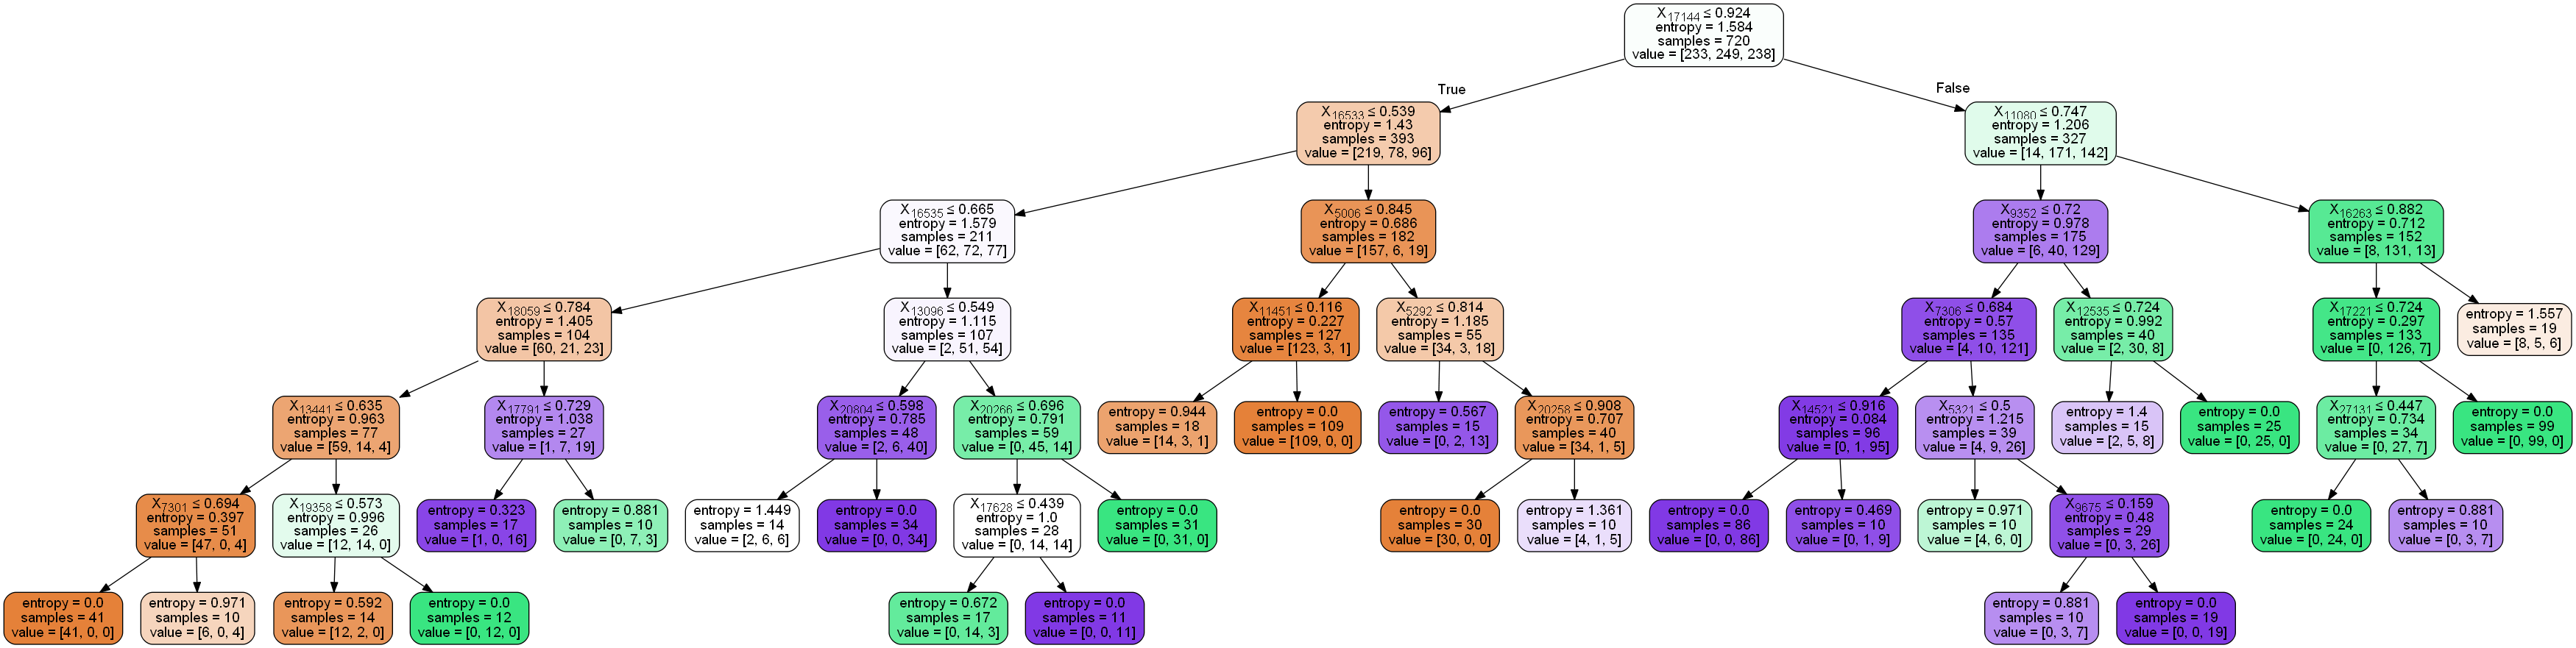

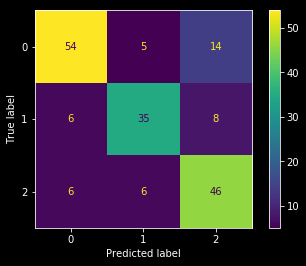

In [142]:
train_model("entropy", 'IG')
Image(filename='IG.png',width=3000, height=10000) 


In [145]:
l = train(X_train_NN,y_train,model,1000,0.0002)

Epoch 0 Loss 2.0914
Epoch 50 Loss 0.2697
Epoch 100 Loss 0.1889
Epoch 150 Loss 0.1450
Epoch 200 Loss 0.1231
Epoch 250 Loss 0.1046
Epoch 300 Loss 0.0998
Epoch 350 Loss 0.0965
Epoch 400 Loss 0.0875
Epoch 450 Loss 0.0770
Epoch 500 Loss 0.0732
Epoch 550 Loss 0.0693
Epoch 600 Loss 0.0652
Epoch 650 Loss 0.0619
Epoch 700 Loss 0.0592
Epoch 750 Loss 0.0553
Epoch 800 Loss 0.0647
Epoch 850 Loss 0.0524
Epoch 900 Loss 0.0485
Epoch 950 Loss 0.0470


In [146]:
model = NeuralNetwork(input_size=27648,layers=[100,50],output_size=3) 

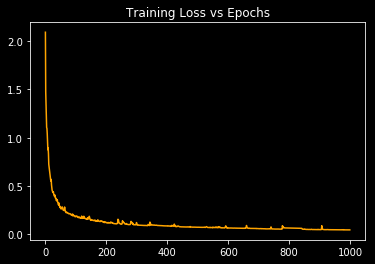

In [147]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l,color="orange")

plt.show()

In [148]:
y_test.shape

(180, 3)

In [149]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X_train_NN,y_train_NN,model))
print("Test Acc %.4f"%getAccuracy(X_test_NN,y_test_NN,model))

Train Acc 0.3639
Test Acc 0.3667


In [150]:
from sklearn.metrics import confusion_matrix

In [151]:
outputs.shape

(720,)

[[ 70  60  56]
 [137 179 169]
 [ 26  10  13]]


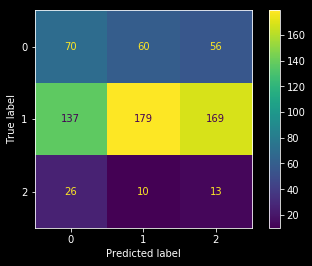

In [152]:
outputs = model.predict(X_train_NN)
cnf_matrix = confusion_matrix(outputs,y_train_NN)
print(cnf_matrix)
cm_display = ConfusionMatrixDisplay(cnf_matrix).plot()

In [153]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(outputs,y_train_NN))

              precision    recall  f1-score   support

           0       0.30      0.38      0.33       186
           1       0.72      0.37      0.49       485
           2       0.05      0.27      0.09        49

    accuracy                           0.36       720
   macro avg       0.36      0.34      0.30       720
weighted avg       0.57      0.36      0.42       720



              precision    recall  f1-score   support

           0       0.29      0.46      0.35        46
           1       0.84      0.35      0.49       118
           2       0.07      0.25      0.11        16

    accuracy                           0.37       180
   macro avg       0.40      0.35      0.32       180
weighted avg       0.63      0.37      0.42       180



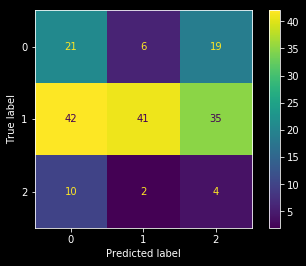

In [155]:
test_outputs = model.predict(X_test_NN)
print(classification_report(test_outputs,y_test_NN))
cnf_matrix = confusion_matrix(test_outputs,y_test_NN)
cm_display = ConfusionMatrixDisplay(cnf_matrix).plot()

In [156]:

# Taking only labels, it will come in handy in future
imbalanced = [i[0] for i in chosen_pokemon]
print(imbalanced)

['Mewtwo', 'Pikachu', 'Charmander']


In [157]:
from collections import Counter
# Counting appearances of each label in labels list
obj = Counter(np.concatenate([y_test_NN, y_train_NN]))

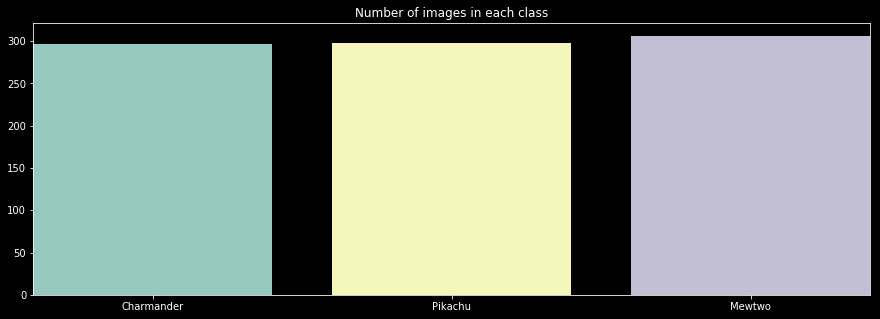

In [158]:
# Plotting number of images in each class
fig = plt.figure(figsize = (15, 5))
sns.barplot(x = [imbalanced[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images in each class')
plt.margins(x=0)
plt.show()

In [159]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In [160]:
#split data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=500,test_size=0.4)

In [161]:
#check shape of training and validation data
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((432, 96, 96, 3),
 (288, 96, 96, 3),
 (432, 3),
 (288, 3),
 (180, 96, 96, 3),
 (180, 3))

In [162]:
# Defining ImageDataGenerator Iinstance
train_datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

test_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator =  train_datagen.flow(X_train, y_train, batch_size=256, shuffle=True)
val_generator = test_datagen.flow(X_val, y_val, batch_size=256, shuffle=True)

In [166]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(imbalanced), activation = 'softmax'))

In [167]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_38 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 48, 48, 64)        36928     
__________

In [168]:
checkpoint = ModelCheckpoint('../working/best_model.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [169]:
history = model.fit_generator(train_generator, validation_data=val_generator, epochs=100, 
                              steps_per_epoch=len(train_generator),validation_steps= len(val_generator),callbacks = [checkpoint])

Epoch 1/100
2/2 [==============================] - 73s 37s/step - loss: 1.5751 - acc: 0.4485 - val_loss: 0.9344 - val_acc: 0.6632
Epoch 2/100


C:\Users\Sanchit\Anaconda2\envs\deeplearning\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


2/2 [==============================] - 60s 30s/step - loss: 0.9855 - acc: 0.6508 - val_loss: 0.5929 - val_acc: 0.7951
Epoch 3/100
2/2 [==============================] - 64s 32s/step - loss: 0.5300 - acc: 0.7974 - val_loss: 0.5998 - val_acc: 0.8160
Epoch 4/100
2/2 [==============================] - 64s 32s/step - loss: 0.4945 - acc: 0.8184 - val_loss: 0.7970 - val_acc: 0.8056
Epoch 5/100
2/2 [==============================] - 64s 32s/step - loss: 0.4185 - acc: 0.8415 - val_loss: 0.9085 - val_acc: 0.8264
Epoch 6/100
2/2 [==============================] - 64s 32s/step - loss: 0.3769 - acc: 0.8611 - val_loss: 1.1418 - val_acc: 0.7917
Epoch 7/100
2/2 [==============================] - 67s 33s/step - loss: 0.3295 - acc: 0.8919 - val_loss: 1.0636 - val_acc: 0.8021
Epoch 8/100
2/2 [==============================] - 58s 29s/step - loss: 0.3035 - acc: 0.9088 - val_loss: 0.9057 - val_acc: 0.8264
Epoch 9/100
2/2 [==============================] - 61s 30s/step - loss: 0.2859 - acc: 0.9105 - val_los

Epoch 65/100
2/2 [==============================] - 54s 27s/step - loss: 0.0358 - acc: 0.9837 - val_loss: 0.3191 - val_acc: 0.9306
Epoch 66/100
2/2 [==============================] - 54s 27s/step - loss: 0.0424 - acc: 0.9831 - val_loss: 0.3474 - val_acc: 0.9271
Epoch 67/100
2/2 [==============================] - 54s 27s/step - loss: 0.0434 - acc: 0.9870 - val_loss: 0.4475 - val_acc: 0.9062
Epoch 68/100
2/2 [==============================] - 56s 28s/step - loss: 0.0324 - acc: 0.9932 - val_loss: 0.4653 - val_acc: 0.9132
Epoch 69/100
2/2 [==============================] - 53s 27s/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.5096 - val_acc: 0.8993
Epoch 70/100
2/2 [==============================] - 54s 27s/step - loss: 0.0267 - acc: 0.9879 - val_loss: 0.6098 - val_acc: 0.8889
Epoch 71/100
2/2 [==============================] - 54s 27s/step - loss: 0.0349 - acc: 0.9864 - val_loss: 0.8314 - val_acc: 0.8646
Epoch 72/100
2/2 [==============================] - 60s 30s/step - loss: 0.0300 - a

In [170]:
y_pred = model.predict(X_test)

In [171]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        73
           1       0.98      0.86      0.91        49
           2       0.76      0.98      0.86        58

    accuracy                           0.89       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.92      0.89      0.90       180



Text(0.5,1,'loss')

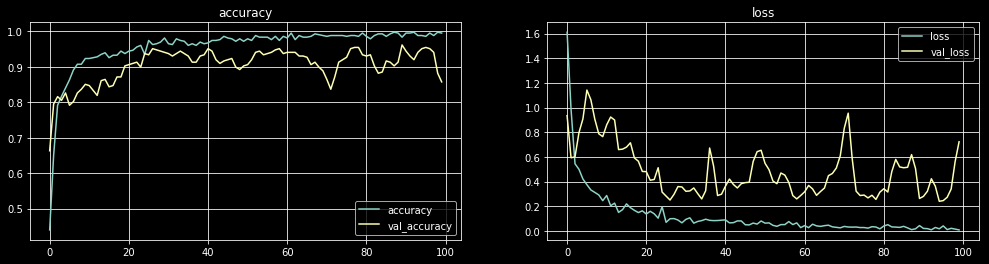

In [172]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')


In [179]:
import random
def vis_pred(X):
    plt.figure(1,figsize=(15, 10))
    for i in range(1,9):
        c = random.randint(0, 5)
        img = X[c]
        plt.subplot(5,8,i)
        plt.imshow(img)
        plt.title(poke_label_dict[np.argmax(model.predict(img.reshape(1,96,96,3)))])

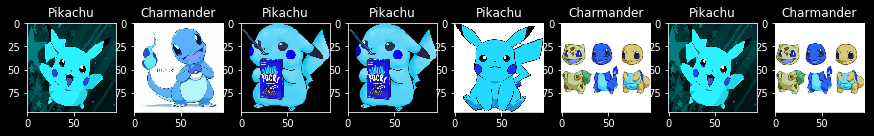

In [180]:
vis_pred(X_test)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        73
           1       0.98      0.86      0.91        49
           2       0.76      0.98      0.86        58

    accuracy                           0.89       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.92      0.89      0.90       180



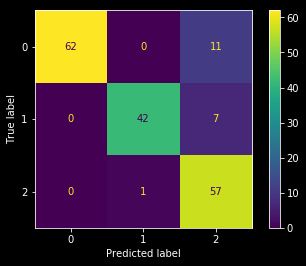

In [184]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm_display = ConfusionMatrixDisplay(cnf_matrix).plot()

In [176]:
#check length of label dictionary
len(poke_label_dict)


3

In [186]:
#visulaize some example in training set and some example in validation set
import random
def vis_ex(X,y):
    plt.figure(1,figsize=(15, 10))
    for i in range(1,9):
        c = random.randint(0, 5)
        img = X[c]
        plt.subplot(5,8,i)
        plt.imshow(img)
        plt.title(poke_label_dict[np.argmax(y[c])])

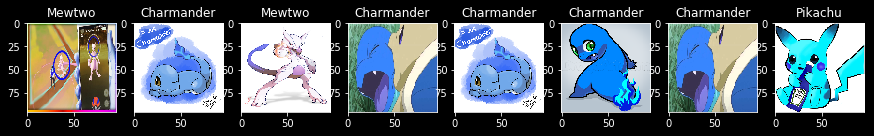

In [189]:
vis_ex(X_train, y_train)

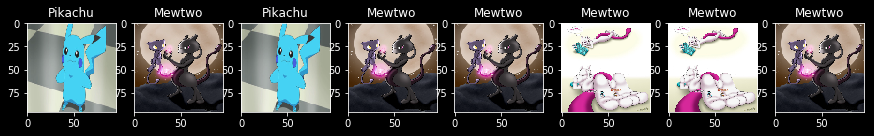

In [190]:
vis_ex(X_val, y_val)

In [191]:
#check shape of training and validation data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((432, 96, 96, 3), (288, 96, 96, 3), (432, 3), (288, 3))

In [192]:
model= Sequential()
#Phase 1: 2 Conv-> Pooling block
model.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), 
                       padding='valid' , input_shape=(96,96,3),activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#Phase 2: Convol Phase
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))) #modified from pool(3,3) to fit the input
#Phase 3: Fully-connected Phase: #modify the second FC layer from original paper due to low number of training examples 
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=y_train.shape[1], activation='softmax'))

In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 22, 22, 96)        34944     
_________________________________________________________________
batch_normalization_46 (Batc (None, 22, 22, 96)        384       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 256)       614656    
_________________________________________________________________
batch_normalization_47 (Batc (None, 10, 10, 256)       1024      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 384)         885120    
__________

In [194]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [195]:
#create datagen during training and validation
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   rotation_range = 45, 
                                   width_shift_range = 0.15,  
                                   height_shift_range = 0.15)
test_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator =  train_datagen.flow(X_train, y_train, batch_size=256, shuffle=True)
val_generator = test_datagen.flow(X_val, y_val, batch_size=256, shuffle=True)

In [196]:
history = model.fit_generator(train_generator, validation_data=val_generator, epochs=100, 
                              steps_per_epoch=len(train_generator),validation_steps= len(val_generator))

Epoch 1/100
2/2 [==============================] - 15s 8s/step - loss: 1.5002 - acc: 0.4710 - val_loss: 7.1392 - val_acc: 0.3715
Epoch 2/100
2/2 [==============================] - 11s 5s/step - loss: 0.7331 - acc: 0.7533 - val_loss: 8.4280 - val_acc: 0.3854
Epoch 3/100
2/2 [==============================] - 11s 5s/step - loss: 0.5954 - acc: 0.7799 - val_loss: 5.8153 - val_acc: 0.4549
Epoch 4/100
2/2 [==============================] - 11s 6s/step - loss: 0.4979 - acc: 0.8442 - val_loss: 2.5838 - val_acc: 0.7222
Epoch 5/100
2/2 [==============================] - 12s 6s/step - loss: 0.4273 - acc: 0.8347 - val_loss: 3.5817 - val_acc: 0.6806
Epoch 6/100
2/2 [==============================] - 11s 5s/step - loss: 0.3705 - acc: 0.8655 - val_loss: 4.5688 - val_acc: 0.6319
Epoch 7/100
2/2 [==============================] - 11s 5s/step - loss: 0.4669 - acc: 0.8664 - val_loss: 3.2949 - val_acc: 0.6736
Epoch 8/100
2/2 [==============================] - 11s 5s/step - loss: 0.3899 - acc: 0.8842 - val

2/2 [==============================] - 10s 5s/step - loss: 0.0457 - acc: 0.9816 - val_loss: 1.5881 - val_acc: 0.7951
Epoch 65/100
2/2 [==============================] - 12s 6s/step - loss: 0.0504 - acc: 0.9810 - val_loss: 0.4167 - val_acc: 0.9375
Epoch 66/100
2/2 [==============================] - 11s 5s/step - loss: 0.0604 - acc: 0.9736 - val_loss: 0.4237 - val_acc: 0.9444
Epoch 67/100
2/2 [==============================] - 11s 5s/step - loss: 0.0660 - acc: 0.9825 - val_loss: 0.5015 - val_acc: 0.9271
Epoch 68/100
2/2 [==============================] - 10s 5s/step - loss: 0.0285 - acc: 0.9858 - val_loss: 0.9557 - val_acc: 0.8368
Epoch 69/100
2/2 [==============================] - 10s 5s/step - loss: 0.0499 - acc: 0.9873 - val_loss: 1.0260 - val_acc: 0.8194
Epoch 70/100
2/2 [==============================] - 10s 5s/step - loss: 0.0582 - acc: 0.9686 - val_loss: 0.5570 - val_acc: 0.9097
Epoch 71/100
2/2 [==============================] - 10s 5s/step - loss: 0.0500 - acc: 0.9837 - val_loss

Text(0.5,1,'loss')

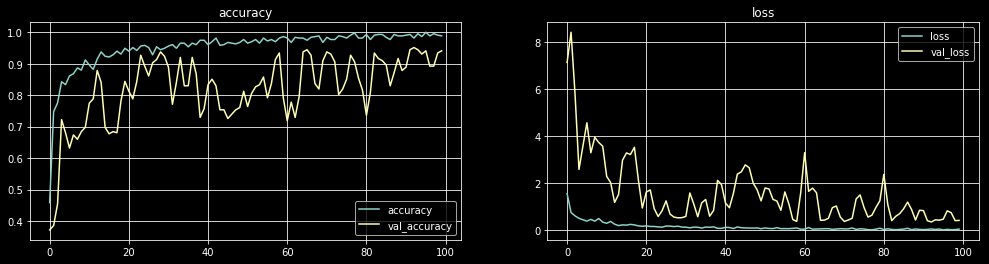

In [201]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [197]:
y_pred = model.predict(X_test)

In [198]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       0.84      0.98      0.91        49
           2       0.98      0.83      0.90        58

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.93       180
weighted avg       0.94      0.94      0.94       180



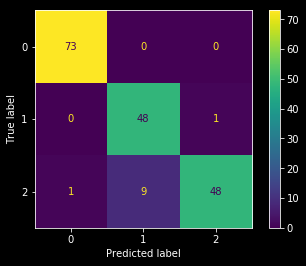

In [203]:
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm_display = ConfusionMatrixDisplay(cnf_matrix).plot()

In [199]:
def vis_pred(X):
    plt.figure(1,figsize=(15, 10))
    for i in range(1,9):
        c = random.randint(0, 5)
        img = X[c]
        plt.subplot(5,8,i)
        plt.imshow(img)
        plt.title(poke_label_dict[np.argmax(model.predict(img.reshape(1,96,96,3)))])

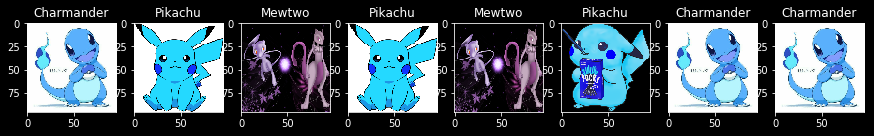

In [200]:
vis_pred(X_test)